# Evaluate the performance of ensemble models with different thresholds

In [1]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import itertools
from google.colab import files
import pickle
import os
import matplotlib.pyplot as plt
import matplotlib
import sklearn
from tqdm import tqdm
import pandas

In [0]:
with open('uncertainty_data_n1.pickle', 'rb') as f:
  data_ensemble_1 = pickle.load(f)
with open('uncertainty_data_n3.pickle', 'rb') as f:
  data_ensemble_3 = pickle.load(f)
with open('uncertainty_data_n5.pickle', 'rb') as f:
  data_ensemble_5 = pickle.load(f)
with open('uncertainty_data_n10_entropy.pickle', 'rb') as f:
  data_ensemble_10_entropy = pickle.load(f)
with open('uncertainty_data_n10_max_p.pickle', 'rb') as f:
  data_ensemble_10_max_p = pickle.load(f)
with open('uncertainty_data_n10_std_dev.pickle', 'rb') as f:
  data_ensemble_10_std_dev = pickle.load(f)

In [6]:
data_ensemble_10_entropy[:20]

,entropy,in_set_acc,out_set_mis
0,0.000000,0.000000,0.000000
1,0.002305,0.869374,0.001060
2,0.004610,0.901184,0.001060
3,0.006915,0.916751,0.001591
4,0.009220,0.926227,0.002121
5,0.011524,0.931980,0.002651
6,0.013829,0.936717,0.004242
7,0.016134,0.941794,0.005302
8,0.018439,0.946193,0.006893
9,0.020744,0.948900,0.009544


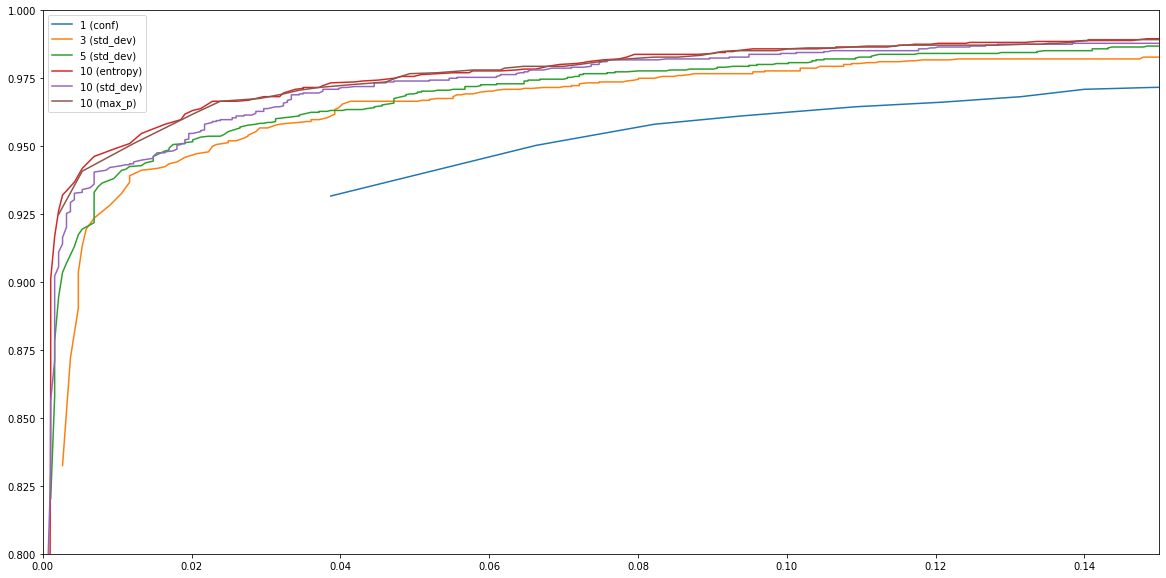

In [7]:
plt.figure(figsize=(20,10))

plt.plot(data_ensemble_1['out_set_mis'], data_ensemble_1['in_set_acc'], label='1 (conf)')
plt.plot(data_ensemble_3['out_set_mis'], data_ensemble_3['in_set_acc'], label='3 (std_dev)')
plt.plot(data_ensemble_5['out_set_mis'], data_ensemble_5['in_set_acc'], label='5 (std_dev)')
plt.plot(data_ensemble_10_entropy['out_set_mis'], data_ensemble_10_entropy['in_set_acc'], label='10 (entropy)')
plt.plot(data_ensemble_10_std_dev['out_set_mis'], data_ensemble_10_std_dev['in_set_acc'], label='10 (std_dev)')
plt.plot(data_ensemble_10_max_p['out_set_mis'], data_ensemble_10_max_p['in_set_acc'], label='10 (max_p)')
plt.xlim(0, 0.15)
plt.ylim(0.8, 1)
plt.legend()